<a href="https://colab.research.google.com/github/esteban1997/-MINTIC-Curso-de-Introducci-n-a-Machine-Learning/blob/master/implementaci%C3%B3n_regresion_lineal_y_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim 

import matplotlib.pyplot as plt

#Regresion lineal

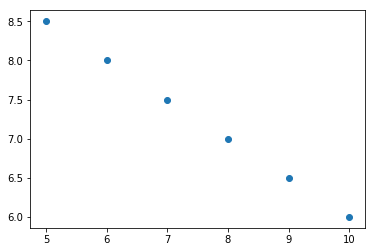

In [0]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6]

plt.scatter(car_prices,units_sold)

In [0]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

prices_array , units_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5],
        [6. ]]))

In [0]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape 

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0160, grad_fn=<MseLossBackward>)


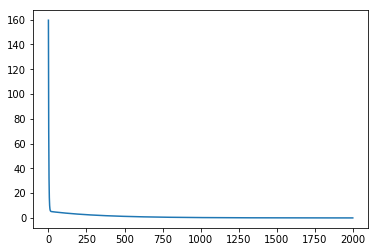

In [0]:
model = nn.Linear(1,1)

#media de los cuadrados
loss_function = nn.MSELoss()

#stocastic gradient descend parametros son los pesos
optimizer = optim.SGD(model.parameters(),lr = 0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  
  #necesito reiniciar gradientes ya que se acumulan 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
print(loss)
plt.plot(range(iterations), losses)

In [0]:
x = torch.Tensor([[14.0]])
p = model(x)
p

tensor([[4.4421]], grad_fn=<AddmmBackward>)

#Regesion logistica

In [0]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[-2.47591188,  3.00711692],
       [-1.9936671 ,  1.18162627],
       [ 1.11265472,  1.03588205],
       [-2.43076266, -1.745708  ],
       [-4.5998501 ,  1.86754382],
       [ 0.46939029,  4.19417443],
       [-0.8806853 , -1.58083244],
       [ 3.88325899, -0.78171662],
       [ 3.94989025,  4.81197613],
       [ 0.02832219, -2.71881107],
       [ 4.14048732,  1.67460205],
       [-1.2404425 ,  0.58982947],
       [-1.9064313 ,  3.37534679],
       [ 5.60653835,  3.18485699],
       [ 0.87921631, -1.71404566],
       [ 1.32899879,  3.24693562],
       [-0.57653713, -2.93047747],
       [-3.34848006, -0.23342774],
       [-0.08982963, -4.15342106],
       [-2.83558867, -3.15073212],
       [-2.22880302, -0.19613189],
       [-4.94600686,  1.27888872],
       [ 3.09836354, -3.20351028],
       [-0.98476662,  7.05113928],
       [-1.88171138,  3.1474739 ],
       [-1.14670789,  0.35250616],
       [-1.88612903,  1.35631309],
       [-2.90405026,  6.23055677],
       [-0.25715572,

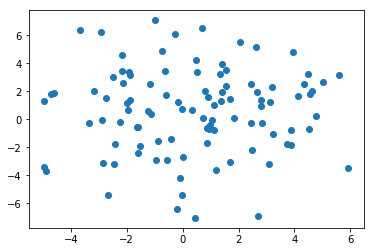

In [0]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [0]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

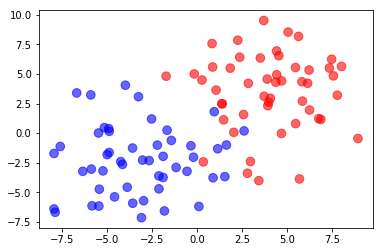

In [0]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)

plt.scatter(data[:,0], data[:,1], c = color, s=75, alpha=0.6)

In [0]:
target = np.array([0]*h + [1]*h).reshape(n,1 )

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1174, grad_fn=<BinaryCrossEntropyBackward>)

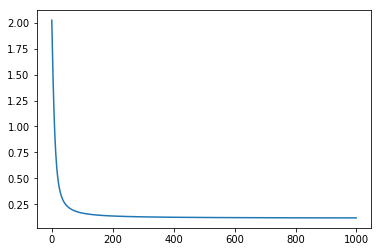

In [0]:
model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(),lr = 0.01)

losses = []

iterations = 1000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()
  
plt.plot(range(iterations),losses)
loss

In [0]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[-5, -6]])
prediction = model(red).data[0][0] < 0.5
print(colors[prediction])

blue
red
